### Context 

As a data analyst, you are tasked to answer the following questions to obtain insights about the data and to conduct predictive modeling to **forecast the presence of heart failure** (variable HeartDisease).

#### Data Dictionary 

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal
Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality
(T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or
definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [**1: heart disease, 0: Normal**]


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("heart.csv")

### 1. Exploratory data analysis

**a)** Get a description, general information, data types, and shape of the dataset.

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Now, let's check some fundamental statistics of the data set
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<span style="color:crimson"> There are some **suspicious minimun values**. `RestingBP` and `Cholesterol` shouldn't be zero, this probably represents the absence of the measure for the patience. 
For `Oldpeak`, the presence of a negative minimun value drags our attention, but understanding the value as a difference compared to a baseline let's assume is not necessarily a mistake </span>  

In [5]:
# Now a description of our categorical values
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<span style="color:crimson"> We see there are not missing values but there are some imprecise data types. I'll adjust `FastingBS` and `HeartDisease` **to integer or boolean** variables, as they can only be either 0 or 1. </span>

**b)** Determine the frequency of distinct values for each feature in the dataset.

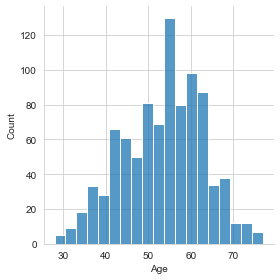

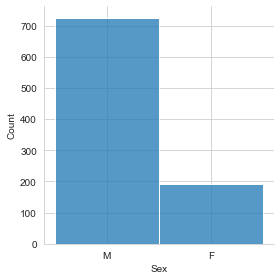

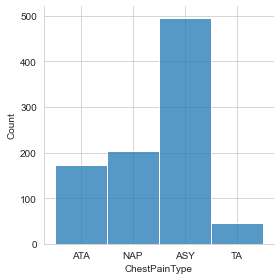

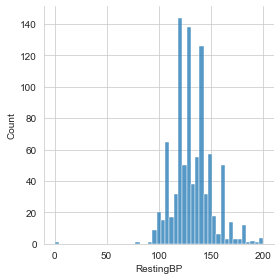

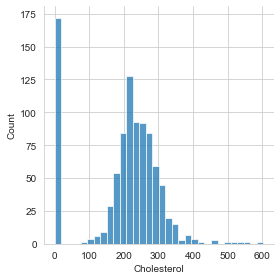

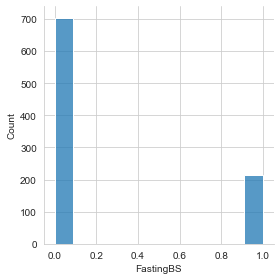

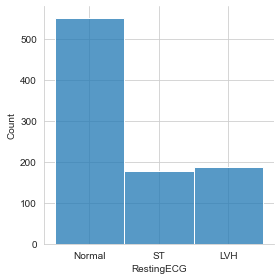

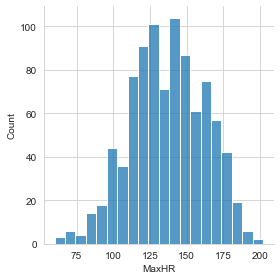

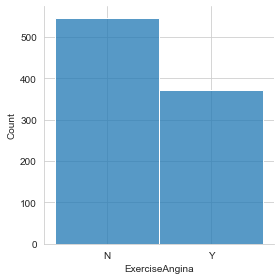

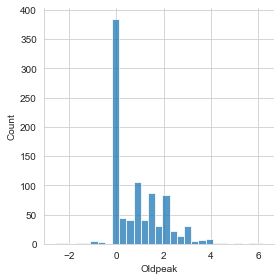

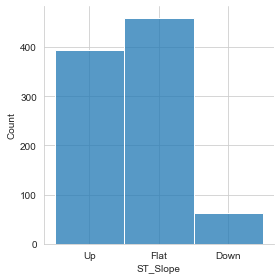

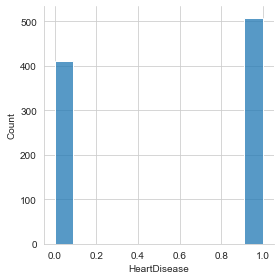

In [8]:
for column in df.columns:
    sns.displot(data=df, x=column,height=4)

In [9]:
for column in df.columns:
    print(f'Count for {column}:')
    print(f'{df[column].value_counts()}\n')

Count for Age:
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

Count for Sex:
M    725
F    193
Name: Sex, dtype: int64

Count for ChestPainType:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Count for RestingBP:
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

Count for Cholesterol:
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, 

<span style="color:crimson"> Following our initial **suspicious minimun values**. We see that `RestingBP` has a small portion  of irregular values. In contrast, `Cholesterol` has a significant number around 19% of our dataset. </span> 

**c)** Plot all features in the dataset to check distribution using a histogram.

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

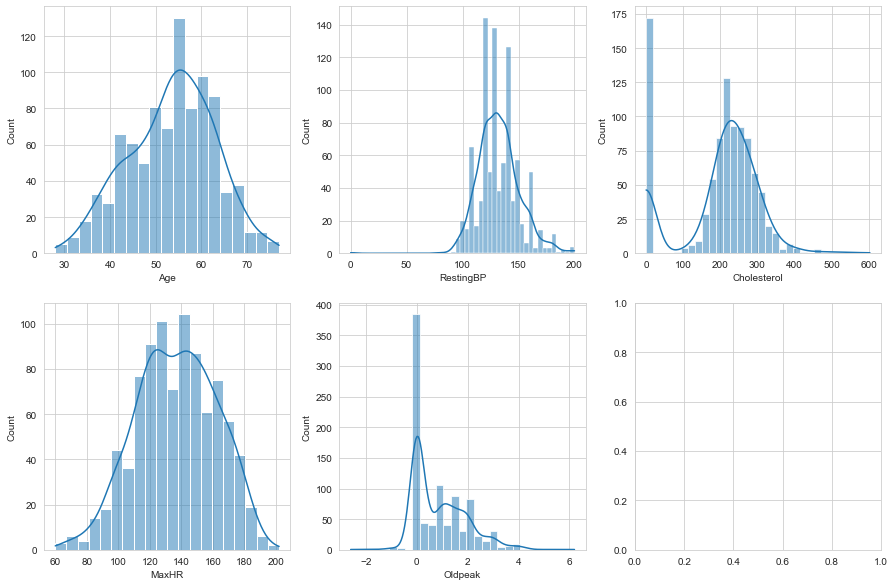

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

sns.histplot(ax=axes[0,0], data=df['Age'], kde=True)
sns.histplot(ax=axes[0,1], data=df['RestingBP'], kde=True)
sns.histplot(ax=axes[0,2], data=df['Cholesterol'], kde=True)

sns.histplot(ax=axes[1,0], data=df['MaxHR'], kde=True)
sns.histplot(ax=axes[1,1], data=df['Oldpeak'], kde=True)

While `Age` appears to follow a normal distribution, we can't say the same for the remaing features. `MaxHR` looks closer to a uniform distribution, whereas `RestingBP` seems left skewed, and the atypical minimum values in `Cholesterol` distort what other way would look like a normal distribution.

**d)** Use a correlation matrix to check for correlation between predictor variables and
drop correlated features (> 0.5).

<AxesSubplot:>

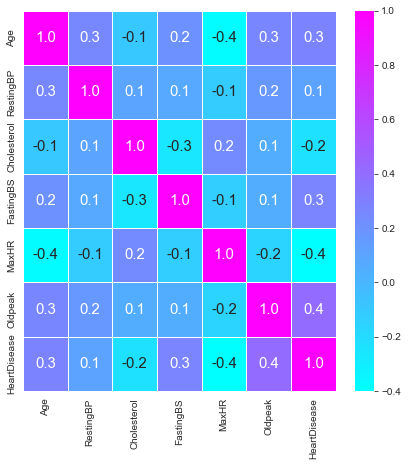

In [11]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True,cmap = "cool", fmt=".1f", linewidths=.5, annot_kws={"fontsize":15} )

The correlation matrix looks good, there is not need to drop too highly correlated values. 

### 2. Feature Engineering 

**a)** Check and drop duplicate and missing values, if it’s the case.

In [12]:
print(f'Duplicated values: {df.duplicated().sum()}')
print(df.shape)

# print(df[df.duplicated()]) # to see duplicated rows

Duplicated values: 0
(918, 12)


In [13]:
#in this case, we don't have duplicate values, so the shape of the df will remain the same after the attempt of dropping them
df = df.drop_duplicates() 
df.shape

(918, 12)

**b)** Check and manage imbalance class, if needed.

As plotted in the count plots before, the classes look balanced. There is not need for using oversampling and undersampling techniques.

**c)** Check (Use boxplots) and take care of outliers (e.g. Cholesterol, Oldpeak) by completing imputation.

<AxesSubplot:title={'center':'Oldpeak'}>

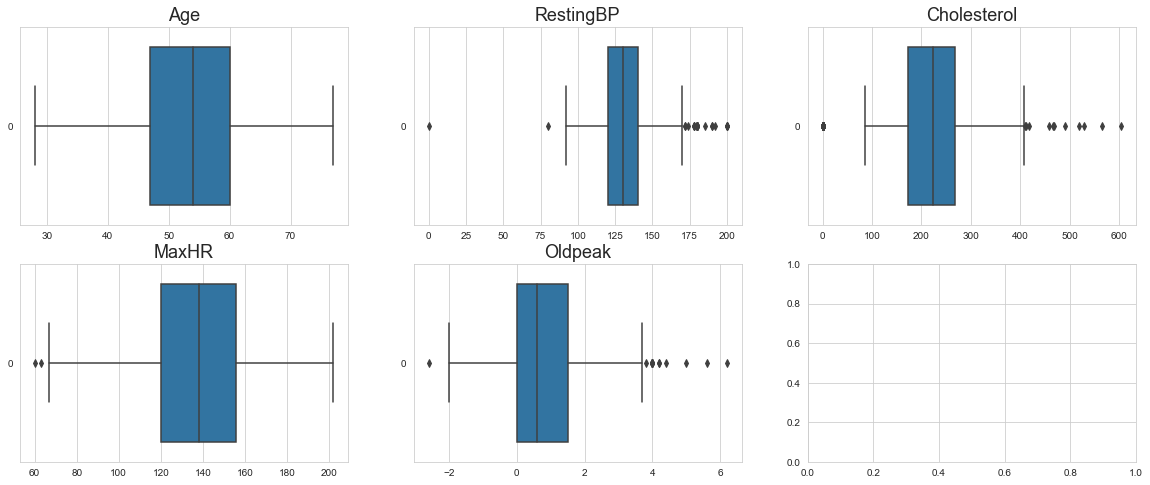

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))

#define titles
axes[0,0].set_title('Age', fontsize=18)
axes[0,1].set_title('RestingBP', fontsize=18)
axes[0,2].set_title('Cholesterol', fontsize=18)
axes[1,0].set_title('MaxHR', fontsize=18)
axes[1,1].set_title('Oldpeak', fontsize=18)

#create the graphs
sns.boxplot(ax=axes[0,0], data=df['Age'], orient="h")
sns.boxplot(ax=axes[0,1], data=df['RestingBP'], orient="h")
sns.boxplot(ax=axes[0,2], data=df['Cholesterol'], orient="h")
sns.boxplot(ax=axes[1,0], data=df['MaxHR'], orient="h")
sns.boxplot(ax=axes[1,1], data=df['Oldpeak'], orient="h")

We can start by treating our previously identified feature issues, let's start fixing `RestingBP`:

In [15]:
df[df["RestingBP"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


We see there is only one abnormal `0` value, we can affort to drop only this record 

In [16]:
df = df[df["RestingBP"]!=0]

Now, let's continue with the abnormal `0` values in `Cholesterol` :

In [17]:
df[df["Cholesterol"]==0].value_counts().sum()

171

As previously shown by the count plot, there are `171` of entries with 0 value, too many to drop, but we can imputate them using the mean of the column  

In [18]:
df["Cholesterol"].replace(to_replace = 0, value = df["Cholesterol"].mean(), inplace=True)

Finally, we can adjust the imprecise data types `FastingBS` and `HeartDisease` **to integer**:

In [19]:
df["FastingBS"] = df["FastingBS"].astype(int)
df["HeartDisease"] = df["HeartDisease"].astype(int)

Let's check if our outliers are gone: 

In [20]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,236.128459,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,56.231401,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,199.016358,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [21]:
# aswell as datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int32  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 86.0+ KB


<AxesSubplot:title={'center':'Oldpeak'}>

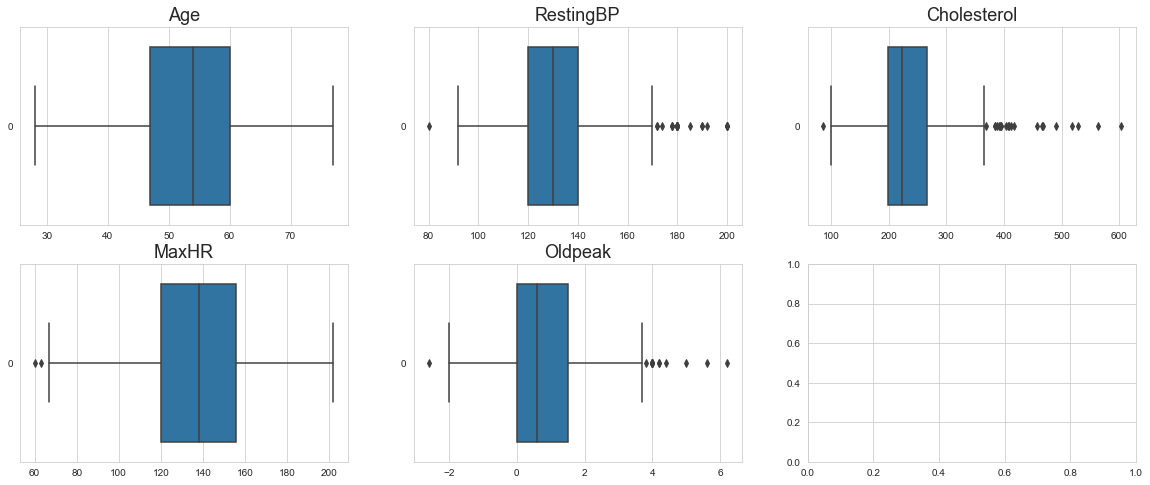

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))

#define title
axes[0,0].set_title('Age', fontsize=18)
axes[0,1].set_title('RestingBP', fontsize=18)
axes[0,2].set_title('Cholesterol', fontsize=18)
axes[1,0].set_title('MaxHR', fontsize=18)
axes[1,1].set_title('Oldpeak', fontsize=18)

#create the graphs
sns.boxplot(ax=axes[0,0], data=df['Age'], orient="h")
sns.boxplot(ax=axes[0,1], data=df['RestingBP'], orient="h")
sns.boxplot(ax=axes[0,2], data=df['Cholesterol'], orient="h")
sns.boxplot(ax=axes[1,0], data=df['MaxHR'], orient="h")
sns.boxplot(ax=axes[1,1], data=df['Oldpeak'], orient="h")

<span style="color:crimson"> For `Cholesterol`, `Oldpeak` and `RestingBP` there are still values above the upper whisker, but there are too many to be considered outliers, and they could be key in our predictors. They would be fixed when we standardize all features. <span>

**d)** Convert categorical data into numerical data using one-hot encoding or any other label encoding approach.

In [23]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,917,917,917,917,917
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,724,496,551,546,459


In [24]:
df = pd.get_dummies(data=df,columns=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"], drop_first=True)

In [25]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1


**e)** Rescale features to a narrow range using a normalization or standardization
function.

> <span style="color:crimson">In order not to introduce future information into the testing explanatory variables (i.e. mean and std deviation), we should perform standarization over the training data and then perform it on testing instances as well. Instead of performing it on the whole dataset. <span> 
    
For this reason, I will be performing this bullet **2.e** in **part 3**

### 3. Modeling
**a)** Partition your data in test (30%) and training (70%).

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
#from sklearn.metrics import f1_score
#from sklearn.metrics import accuracy_score
#from sklearn.decomposition import PCA

features = df.loc[ : , df.columns != "HeartDisease"]
target  = df["HeartDisease"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(641, 15)
(641,)
(276, 15)
(276,)


**2.e)** Rescale features to a narrow range using a normalization or standardization function.

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**b)** Use KNN, SVM, and Decision Tree Classifier classifiers to predict the class.

### <span style="color:crimson"> KNN - K-Nearest Neighbor </span>

In [30]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)         # create the model
KNN.fit(X_train_scaled, y_train)                  # train the model 
KNN_y_pred = KNN.predict(X_test_scaled)           # ask the model to predict on the test set

print(classification_report(y_test, KNN_y_pred))  # show result metrics

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       107
           1       0.90      0.86      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



### <span style="color:crimson"> SVM - Support vector machine </span>

In [31]:
from sklearn.svm import SVC

SVM = SVC(random_state=42)                         # create the model
SVM.fit(X_train_scaled, y_train)                   # train the model
SVM_y_pred = SVM.predict(X_test_scaled)            # ask the model to predict on the test set

print(classification_report(y_test, SVM_y_pred))   # show result metrics

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       107
           1       0.91      0.88      0.89       169

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



### <span style="color:crimson"> DT - Decision Tree </span>

In [32]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=42)    # create the model
DT.fit(X_train_scaled, y_train)                 # train the model
DT_y_pred = DT.predict(X_test_scaled)           # ask the model to predict on the test set

print(classification_report(y_test, DT_y_pred)) # show result metrics

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       107
           1       0.86      0.75      0.80       169

    accuracy                           0.77       276
   macro avg       0.76      0.77      0.76       276
weighted avg       0.78      0.77      0.77       276



### 4. Model evaluation and Selection
a) Using the function GridSearchCV find the best estimators (criterion, max_depth, min_samples_leaf) for your DT model.

In [33]:
from sklearn.model_selection import GridSearchCV

DT_parameters = {'criterion': ['gini', 'entropy'],
                 'max_depth': range(1, 10),
                 'min_samples_leaf': range(2, 10)
              }

DT_gridsearch = GridSearchCV(DT, DT_parameters)
DT_gridsearch.fit(X_train_scaled, y_train)

print(f'best parameters: {DT_gridsearch.best_params_}')
print(f'best score: {DT_gridsearch.best_score_}')

best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}
best score: 0.8236676356589147


**b)** Using the best parameters for the DT run the model and get the prediction.


In [34]:
DT_tuned = DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_leaf = 2, random_state = 42)

DT_tuned.fit(X_train_scaled, y_train)
DT_tuned_y_pred = DT_tuned.predict(X_test_scaled)
print(classification_report(y_test, DT_tuned_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       107
           1       0.83      0.92      0.87       169

    accuracy                           0.84       276
   macro avg       0.84      0.81      0.82       276
weighted avg       0.84      0.84      0.83       276



**c)** Compare the results of the models based on the metrics: precision, recall, accuracy, F-measure from steps **3.b** and **4.b.**

#### <span style="color:crimson"> First, let's compare between the two DT models:

In [35]:
print(f'First DT without Hyperparameter tuning: \n\n {classification_report(y_test, DT_y_pred)}')
print(f'Second DT after Hyperparameter tuning:  \n\n {classification_report(y_test, DT_tuned_y_pred)}')

First DT without Hyperparameter tuning: 

               precision    recall  f1-score   support

           0       0.67      0.80      0.73       107
           1       0.86      0.75      0.80       169

    accuracy                           0.77       276
   macro avg       0.76      0.77      0.76       276
weighted avg       0.78      0.77      0.77       276

Second DT after Hyperparameter tuning:  

               precision    recall  f1-score   support

           0       0.84      0.71      0.77       107
           1       0.83      0.92      0.87       169

    accuracy                           0.84       276
   macro avg       0.84      0.81      0.82       276
weighted avg       0.84      0.84      0.83       276



<span style="color:crimson"> After the hyperparameter tuning, we can see an **overall improvement**, `accuracy` increased **from 0.77 to 0.84**. Also `f1 score`, showed improvement for **not heart disease** prediction **from 0.73 to 0.77**, as well as for **heart disease** prediction going **from 0.80 to 0.87**. 

<span style="color:crimson"> More in detail, `precision` for **not heart disease** increased **from 0.67 to 0.84**, while losing some precision for **heart disease** predicition, going **from 0.86 to 0.83**. 
    
<span style="color:crimson"> Finally, in `Recall` we see a decline for **not heart disease** prediction, going **from 0.80 to 0.71** to gain a better recall for **heart disease** going **from 0.75 to 0.92**. This also shows an improvement at identifying positive cases, but may lead to more false positives.

In [36]:
print(f'DT tuned: \n\n {classification_report(y_test, DT_tuned_y_pred)}\n')
print(f'KNN:      \n\n {classification_report(y_test, KNN_y_pred)}\n')
print(f'SVM:      \n\n {classification_report(y_test, SVM_y_pred)}\n')

DT tuned: 

               precision    recall  f1-score   support

           0       0.84      0.71      0.77       107
           1       0.83      0.92      0.87       169

    accuracy                           0.84       276
   macro avg       0.84      0.81      0.82       276
weighted avg       0.84      0.84      0.83       276


KNN:      

               precision    recall  f1-score   support

           0       0.79      0.85      0.82       107
           1       0.90      0.86      0.88       169

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276


SVM:      

               precision    recall  f1-score   support

           0       0.82      0.87      0.84       107
           1       0.91      0.88      0.89       169

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.88      0.87

<span style="color:crimson"> Regarding the `f1-score` between models, after tuning the DT, the scores are very similar. In ascending order: for the **DT 0.87, followed by KNN 0.88 and leading SVM 0.89**. The same order remains for the `accuracy`. **Tuned DT 0.84, followed by KNN 0.86 and SVM 0.87.** Setting SVM as a potencial best model.
    
<span style="color:crimson"> More in detail, in `precision` for **not heart disease** DT has the higher score **(DT: 0.84 SVM: 0.82 & KNN: 0.79)**, while for **heart disease** predicition, SVM leads **(SVM: 0.91 KNN: 0.90 & DT: 0.83)** All models with an excellent performance at identifying positive cases.  
    
<span style="color:crimson"> Finally, for `Recall` we see that for **not heart disease** prediction SVM has the highest score **(SVM: 0.87 KNN: 0.85 & DT: 0.71)** but for better recall in **heart disease** DT is the leader **(DT: 0.92 SVM: 0.88 & KNN: 0.86)**.

**d)** Plot the ROC graph for each model and compare the performance for each one (**3.b** and **4.b**)

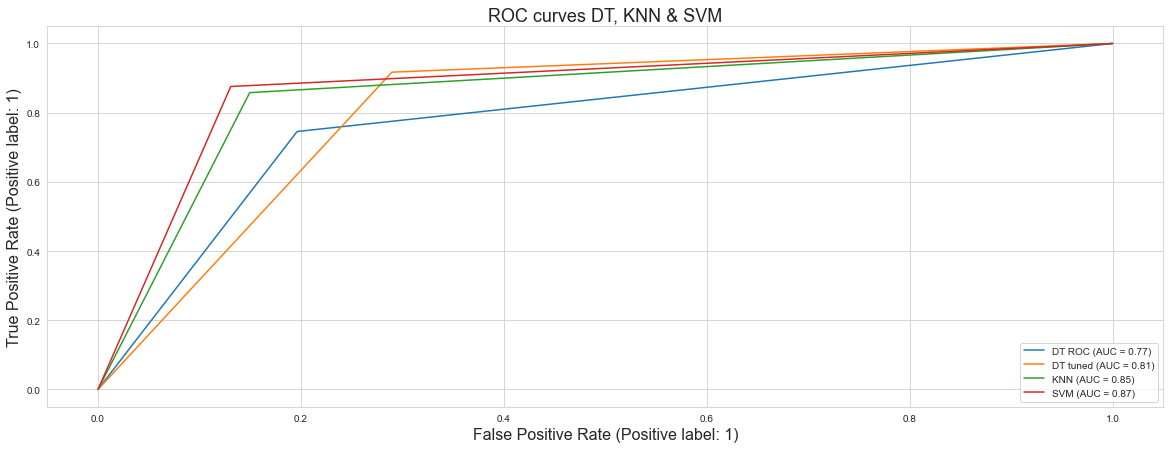

In [37]:
from sklearn.metrics import RocCurveDisplay

fig, axes = plt.subplots(figsize=(20,7))

#define title and some graph settings
axes.set_title('ROC curves DT, KNN & SVM', fontsize=18)
plt.ylabel("", fontsize=16)
plt.xlabel("", fontsize=16)

#create the graph
RocCurveDisplay.from_predictions(y_test, DT_y_pred, name="DT ROC", ax=axes)
RocCurveDisplay.from_predictions(y_test, DT_tuned_y_pred, name="DT tuned", ax=axes)
RocCurveDisplay.from_predictions(y_test, KNN_y_pred, name="KNN", ax=axes)
RocCurveDisplay.from_predictions(y_test, SVM_y_pred, name="SVM", ax=axes)



e) Explain which is the best model according to each criterion from **4.c)** and **4.d)**.

<span style="color:crimson"> According to previous explanation, the *SVM* is the best model comparated with *DT & KNN models*. The **SVM** has an **overall better performance** measured by `accuracy` and `f1 score`. Additionally, it has better performance at identifying positive cases for **heart disease** which is, in this case, the result with more real impact. 
    
<span style="color:crimson"> Finally, comparing the ROC curves strengthens our election. With **greater AUC** (Area Under the Curve) the **SVM** model has a better ability distinguishing between classes. **SVM AUC 0.87 , KNN AUC = 0.85 , DT tunned AUC = 0.81 , DT AUC = 0.77**.  